#**Lab 09 XOR - Deep Neural Network - Eager**

* XOR 문제를 Deep Neural Network을 활용해 풀어본다.

###**기본 Library 선언 및 Tensorflow 버전 확인**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)

print(tf.__version__)

2.4.0


###**사용할 Data**

* x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분하는 예제
* 붉은색과 푸른색으로 0과 1을 표시

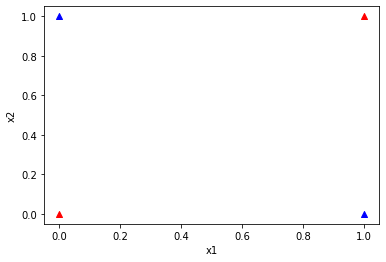

In [2]:
x_data = [[0,0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0], x_data[0][1], c='red', marker='^')
plt.scatter(x_data[3][0], x_data[3][1], c='red', marker='^')
plt.scatter(x_data[1][0], x_data[1][1], c='blue', marker='^')
plt.scatter(x_data[2][0], x_data[2][1], c='blue', marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

##**Tensorflow Eager**

###**위 Data를 기준으로 XOR 처리를 위한 모델을 생성**

* Tensorflow data API를 통해 학습시킬 값들을 담는다.

   (Batch Size는 한번에 학습시킬 Size로 정한다)

* features, labels는 실제 학습에 쓰일 Data

  (연산을 위해 Type을 맞춰준다.)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
  def __init__(self, nb_classes):
    super(wide_deep_nn, self).__init__()

    self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
    self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

    self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
    self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

    self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
    self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

    self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
    self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')

    self.variables = [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3, self.W4, self.b4]

  def preprocess_data(self, features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

  def deep_nn(self, features):
    layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
    layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
    layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
    hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
    return hypothesis

  def loss_fn(self, hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels)*tf.math.log(1 - hypothesis))
    return cost

  def accuracy_fn(self, hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

  def grad(self, hypothesis, features, labels):
    with tf.GradientTape() as tape:
      loss_value = self.loss_fn(self.deep_nn(features), features, labels)
    return tape.gradient(loss_value, self.variables)

  def fit(self, dataset, EPOCHS=20000, verbose=500):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    for step in range(EPOCHS):
      for features, labels in dataset:
        features, labels = self.preprocess_data(features, labels)
        grads = self.grad(self.deep_nn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
        if step % verbose == 0:
          print("Iter : {} , Loss : {:.4f}".format(step, self.loss_fn(self.deep_nn(features), features, labels)))

  def test_model(self, x_data, y_data):
    x_data, y_data = self.preprocess_data(x_data, y_data)
    test_acc = self.accuracy_fn(self.deep_nn(x_data), y_data)
    print("Testset Accuracy: {:.4f}".format(test_acc))

Deep Neural Network를 통해 XOR 해결

* 위의 Data를 4Layer의 Neural Network를 통해 학습 후 모델 생성

In [4]:
model = wide_deep_nn(nb_classes)

In [5]:
model.fit(dataset)

Iter : 0 , Loss : 1.0398
Iter : 500 , Loss : 0.6936
Iter : 1000 , Loss : 0.6923
Iter : 1500 , Loss : 0.6912
Iter : 2000 , Loss : 0.6901
Iter : 2500 , Loss : 0.6890
Iter : 3000 , Loss : 0.6879
Iter : 3500 , Loss : 0.6867
Iter : 4000 , Loss : 0.6855
Iter : 4500 , Loss : 0.6842
Iter : 5000 , Loss : 0.6827
Iter : 5500 , Loss : 0.6811
Iter : 6000 , Loss : 0.6793
Iter : 6500 , Loss : 0.6772
Iter : 7000 , Loss : 0.6749
Iter : 7500 , Loss : 0.6721
Iter : 8000 , Loss : 0.6690
Iter : 8500 , Loss : 0.6653
Iter : 9000 , Loss : 0.6610
Iter : 9500 , Loss : 0.6560
Iter : 10000 , Loss : 0.6501
Iter : 10500 , Loss : 0.6431
Iter : 11000 , Loss : 0.6348
Iter : 11500 , Loss : 0.6249
Iter : 12000 , Loss : 0.6131
Iter : 12500 , Loss : 0.5989
Iter : 13000 , Loss : 0.5817
Iter : 13500 , Loss : 0.5607
Iter : 14000 , Loss : 0.5351
Iter : 14500 , Loss : 0.5039
Iter : 15000 , Loss : 0.4667
Iter : 15500 , Loss : 0.4237
Iter : 16000 , Loss : 0.3762
Iter : 16500 , Loss : 0.3268
Iter : 17000 , Loss : 0.2787
Iter : 17

In [6]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000
